<a href="https://colab.research.google.com/github/qmaruf/pyspark/blob/main/pyspark_install_pyspart_in_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pyspark

In [2]:
! wget http://files.grouplens.org/datasets/movielens/ml-100k.zip -P ./data
! unzip ./data/ml-100k.zip -d ./data/

--2021-01-10 03:25:08--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘./data/ml-100k.zip.1’

ml-100k.zip.1       100%[===================>]   4.70M  13.9MB/s    in 0.3s    

2021-01-10 03:25:08 (13.9 MB/s) - ‘./data/ml-100k.zip.1’ saved [4924029/4924029]

Archive:  ./data/ml-100k.zip
replace ./data/ml-100k/allbut.pl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./data/ml-100k/allbut.pl  
  inflating: ./data/ml-100k/mku.sh   
  inflating: ./data/ml-100k/README   
  inflating: ./data/ml-100k/u.data   
  inflating: ./data/ml-100k/u.genre  
  inflating: ./data/ml-100k/u.info   
  inflating: ./data/ml-100k/u.item   
  inflating: ./data/ml-100k/u.occupation  
  inflating: ./data/ml-100k/u.user   
  inflating: ./data/

In [3]:
from pyspark import SparkConf, SparkContext
import collections

In [5]:
conf = SparkConf().setMaster('local').setAppName('ratingHistogram')
sc = SparkContext(conf=conf)

In [7]:
lines = sc.textFile('./data/ml-100k/u.data')

In [8]:
lines

./data/ml-100k/u.data MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [9]:
! head ./data/ml-100k/u.data

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817
6	86	3	883603013


In [11]:
ratings = lines.map(lambda line: line.split()[2])
counter = ratings.countByValue()
counter

defaultdict(int, {'1': 6110, '2': 11370, '3': 27145, '4': 34174, '5': 21201})

In [27]:
ratings_key = list(counter.keys())
ratings_val = list(counter.values())

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Ratings')]

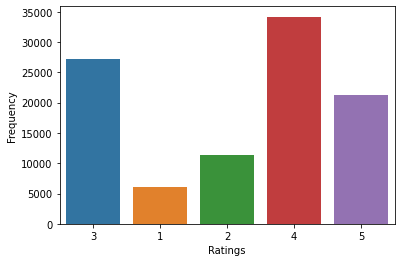

In [31]:
ax = sns.barplot(ratings_key, ratings_val)
ax.set(xlabel="Ratings", ylabel = "Frequency")